## Importing Necessary libraries

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, warnings

warnings.filterwarnings('ignore')


## Loading the data

In [2]:
df = pd.read_csv("world_population.csv")
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [3]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## Seperating numeric and object column names.

In [5]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
obj_cols = [col for col in df.columns if df[col].dtype == 'O']

In [6]:
obj_cols, num_cols

(['CCA3', 'Country/Territory', 'Capital', 'Continent'],
 ['Rank',
  '2022 Population',
  '2020 Population',
  '2015 Population',
  '2010 Population',
  '2000 Population',
  '1990 Population',
  '1980 Population',
  '1970 Population',
  'Area (km²)',
  'Density (per km²)',
  'Growth Rate',
  'World Population Percentage'])

Insight: This dataset contains 4 object columns namely 'CCA3', 'Country/Territory', 'Capital', 'Continent'. Rest of all columns are numeric.

In [7]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


Insight: min population gradually decreases and max population gradually increases according to the yearwise census from 1970 to 2022. That means, in some countries population is decreasing as well as in some countries, the population is getting increased year after year.

Text(1.0, 1.0, 'Area of the Continents')

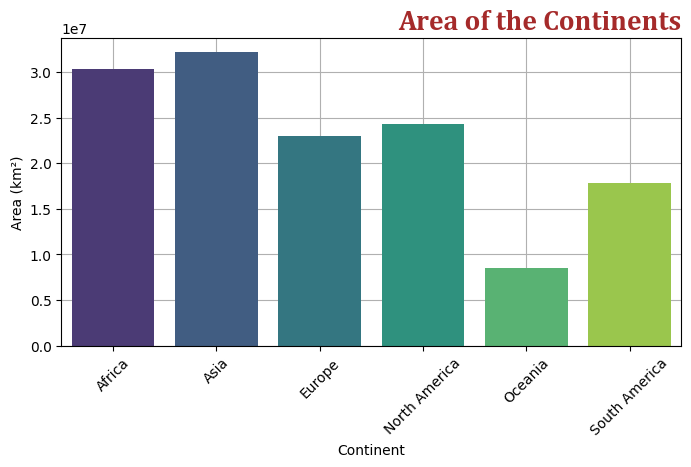

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=df.groupby('Continent').sum(), x='Continent', y='Area (km²)', palette='viridis', zorder=2)
plt.grid(zorder=0)
plt.xticks(rotation=45)
plt.title("Area of the Continents", loc='right', color='brown', fontweight="bold", fontsize=20, fontname='Cambria')

Insight: Asia and Africa are considerably large continents and Oceania is the smallest continent in the world.

Text(1.0, 1.0, 'Continent wise population of 2022')

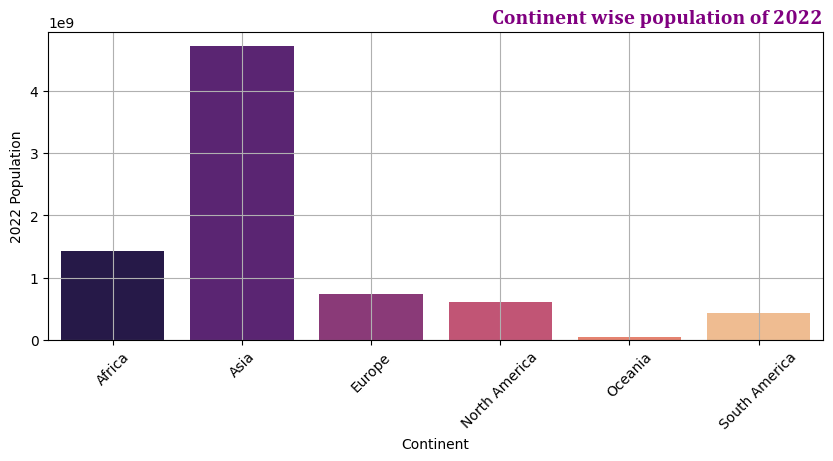

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(data=df.groupby('Continent').sum(),x='Continent', y='2022 Population', palette='magma')
plt.grid(zorder=0)
plt.xticks(rotation=45)
plt.title("Continent wise population of 2022", loc='right', color='purple', fontweight="bold", fontsize=15, fontname='Cambria')

Insight: Population of Asia is significantly high and least population is from Oceania.

In [10]:
pop_den = [df['Density (per km²)'][df['Continent'] == i].mean() for i in df['Continent'].unique()]

Text(1.0, 1.0, 'Population density of the continents')

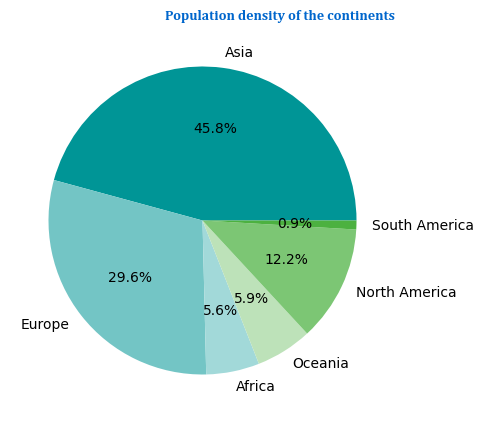

In [14]:
plt.figure(figsize=(5,5))
plt.pie(pop_den, labels=df['Continent'].unique(), autopct= '%1.1f%%', colors=['#009596', '#73C5C5', '#A2D9D9', '#BDE2B9', '#7CC674', '#4CB140', '#38812F'])
plt.title("Population density of the continents", loc='right', color='#06C', fontweight="bold", fontsize=10, fontname='Cambria')

Insight: As compared to the area of the continent; africa has lesser population density than Oceania.
South America's population density is significantly low. Asia has a huge population density.